In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



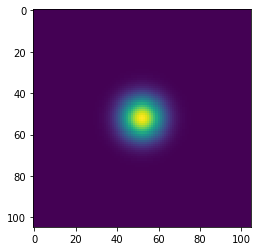

In [28]:
# GAUSSIAN KERNEL
sigma=7
gass_ker=cv2.getGaussianKernel(15*sigma,sigma)
gauss_ker=gass_ker@gass_ker.T
plt.imshow(gauss_ker)

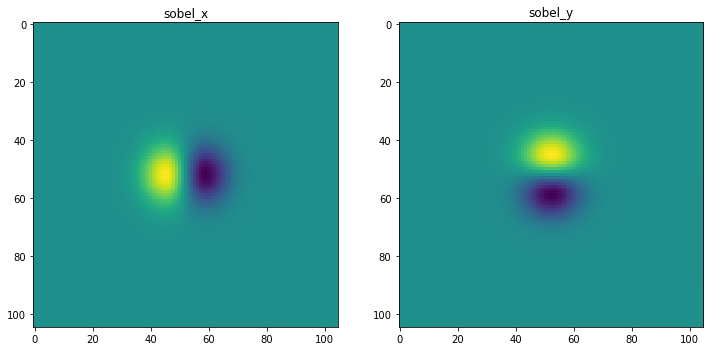

In [29]:
# DERIVATIVE OF GAUSSIAN KERNEL  by 

sobel_x=cv2.Sobel(gauss_ker,cv2.CV_64F,1,0,ksize=5)
sobel_y=cv2.Sobel(gauss_ker,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(sobel_x),plt.title("sobel_x")
plt.subplot(122)
plt.imshow(sobel_y),plt.title("sobel_y")
plt.show()

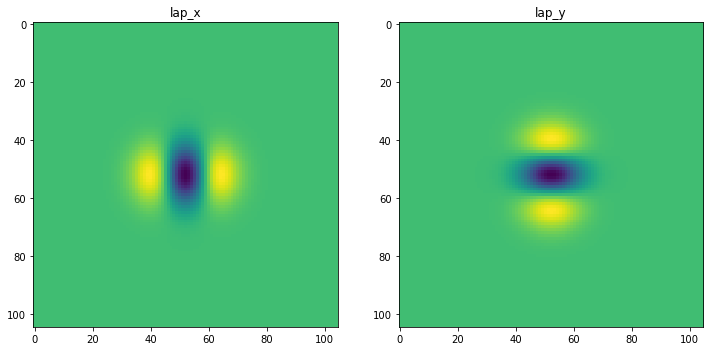

In [30]:
# AGAIN DERIVATIVE OF  DERIVATIVE GAUSSIAN KERNEL  ,i,e, GETTING LAPLACIAN

lap_x=cv2.Sobel(sobel_x,cv2.CV_64F,1,0,ksize=5)
lap_y=cv2.Sobel(sobel_y,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(lap_x),plt.title("lap_x")
plt.subplot(122)
plt.imshow(lap_y),plt.title("lap_y")
plt.show()

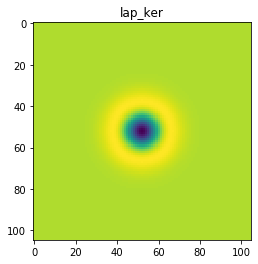

In [31]:
# LAPLACIAN OF GAUSSIAN 
LOG=lap_x+lap_y
plt.imshow(LOG),plt.title("lap_ker")
plt.show()

In [38]:
# MAKING FUNCTION THAT TAKE INPUT AS sigma and img AND GIVE FILTERED IMGAE AS OUTPUT  [BLOB DETECTION]


def get_img_filtered_by_LOG(sigma,ker_size,img):
    gass_ker=cv2.getGaussianKernel(ker_size,sigma)
    gauss_ker=gass_ker@gass_ker.T
    
    sobel_x=cv2.Sobel(gauss_ker,cv2.CV_64F,1,0,ksize=5)
    sobel_y=cv2.Sobel(gauss_ker,cv2.CV_64F,0,1,ksize=5)

    lap_x=cv2.Sobel(sobel_x,cv2.CV_64F,1,0,ksize=5)
    lap_y=cv2.Sobel(sobel_y,cv2.CV_64F,0,1,ksize=5)
    
    LOG=lap_x+lap_y
    
    filt_img=cv2.filter2D(img,-1,LOG)
    return plt.imshow(filt_img)
    
    

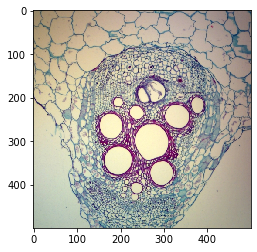

In [66]:
# IMAGE READING
img1=cv2.imread("a.jpg")[:,:,::-1]
plt.imshow(img1)



for sigma=1


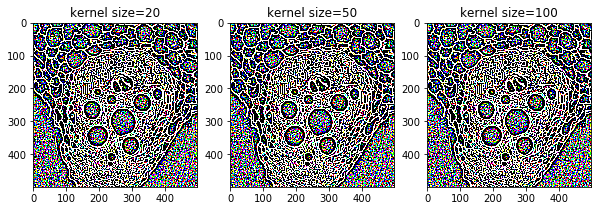



for sigma=3


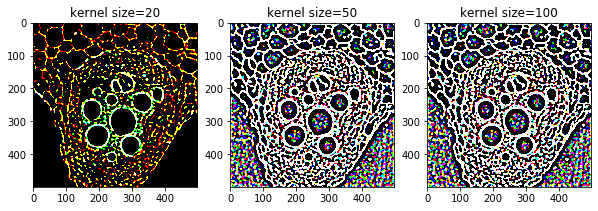



for sigma=5


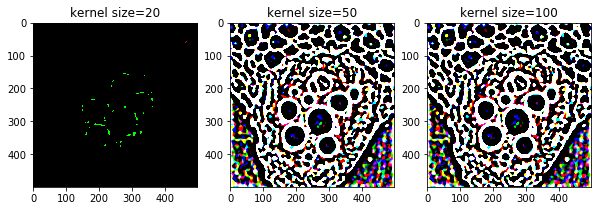



for sigma=8


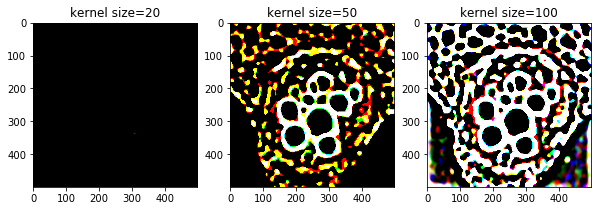



for sigma=12


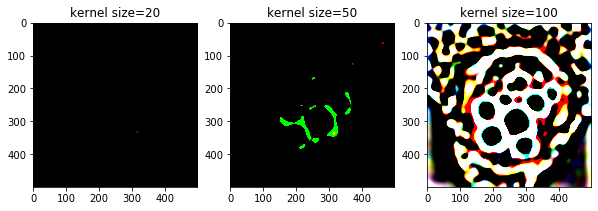

In [84]:
# plotting for kernel of diffrent sigma and kernel size

plt.figure(figsize=(10,10))
print("\n\nfor sigma=1")
plt.subplot(131)
get_img_filtered_by_LOG(1,20,img1),plt.title("kernel size=20")
plt.subplot(132)
get_img_filtered_by_LOG(1,50,img1),plt.title("kernel size=50")
plt.subplot(133)
get_img_filtered_by_LOG(1,100,img1),plt.title("kernel size=100")
plt.show()

plt.figure(figsize=(10,10))
print("\n\nfor sigma=3")
plt.subplot(131)
get_img_filtered_by_LOG(3,20,img1),plt.title("kernel size=20")
plt.subplot(132)
get_img_filtered_by_LOG(3,50,img1),plt.title("kernel size=50")
plt.subplot(133)
get_img_filtered_by_LOG(3,100,img1),plt.title("kernel size=100")
plt.show()

plt.figure(figsize=(10,10))
print("\n\nfor sigma=5")
plt.subplot(131)
get_img_filtered_by_LOG(5,20,img1),plt.title("kernel size=20")
plt.subplot(132)
get_img_filtered_by_LOG(5,50,img1),plt.title("kernel size=50")
plt.subplot(133)
get_img_filtered_by_LOG(5,100,img1),plt.title("kernel size=100")
plt.show()

plt.figure(figsize=(10,10))
print("\n\nfor sigma=8")
plt.subplot(131)
get_img_filtered_by_LOG(8,20,img1),plt.title("kernel size=20")
plt.subplot(132)
get_img_filtered_by_LOG(8,50,img1),plt.title("kernel size=50")
plt.subplot(133)
get_img_filtered_by_LOG(8,100,img1),plt.title("kernel size=100")
plt.show()

plt.figure(figsize=(10,10))
print("\n\nfor sigma=12")
plt.subplot(131)
get_img_filtered_by_LOG(12,30,img1),plt.title("kernel size=20")
plt.subplot(132)
get_img_filtered_by_LOG(12,50,img1),plt.title("kernel size=50")
plt.subplot(133)
get_img_filtered_by_LOG(12,100,img1),plt.title("kernel size=100")
plt.show()

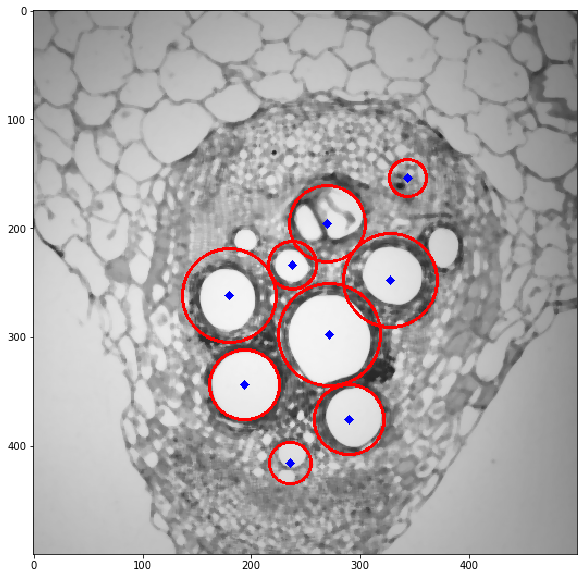

In [78]:

img = cv2.imread('a.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,50,
                            param1=250,param2=30,minRadius=15,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize=(10,10))    
plt.imshow(cimg)